# **xSoc Python Course** - Week 6

### *Efficiency, Compactness & Readability*

🖋️ *Written by Alia & Keegan from the [Computing Society](https://go.uwcs.uk/links)*

---

## Expect Everything
Throughout the course, you may have run into an error message or two (or three or...). In Python, we typically refer to these as **Exceptions**.

It would be really inconvenient if all programs, ever, crashed the first time they ran into a problem. Luckily, we can write code to deal with these exceptions, should they arise - this is **Exception Handling**. For example, look at this short script that takes an input, converts it to an `int` and doubles it:

In [ ]:
num = int(input("Enter a number: "))
num *= 2
print(num)

Seems fine? But what if the user decides they *don't* want to enter a number, what if, e.g., they enter "Hello"? Python doesn't know how to convert a string to an integer, so it will throw a `ValueError` and exit the program.

In reality, entering the wrong type of data isn't the end of the world. To stop Python from exiting immediately, we can surround any potentially problem-causing code in a `try-except` block like this:

In [ ]:
try:
    num = int(input("Enter a number"))
    num *= 2
    print(num)
except ValueError:
    print("uh oh - that wasn't a number")

The `try` statement tells the Python interpreter that something could go wrong in the following statements, but we know and have ways to deal with it. Any statements after the `try-except` block will execute normally, even if a `ValueError` is raised.

Note: we need `num *= 2` and `print(num)` in the `try` block because if the user inputs something wrong, `num` won't be defined. If the statements were *after* the try statement, this could cause an error as `num` wouldn't be defined.

We can also catch multiple types of exceptions!

In [ ]:
try:
    num = int(input("Enter a number"))
    result = 2 / num
    print(result)
except ValueError:
    print("uh oh - that wasn't a number")
except ZeroDivisionError:
    print("Friends don't let friends divide by zero")

All exceptions are a type of class, all inheriting from the **Exception** class. Also, certain exceptions are also subclasses of other exceptions, e.g. `ZeroDivisionError` is a subclass of `ArithmeticError`, here's a full hierarchy: 

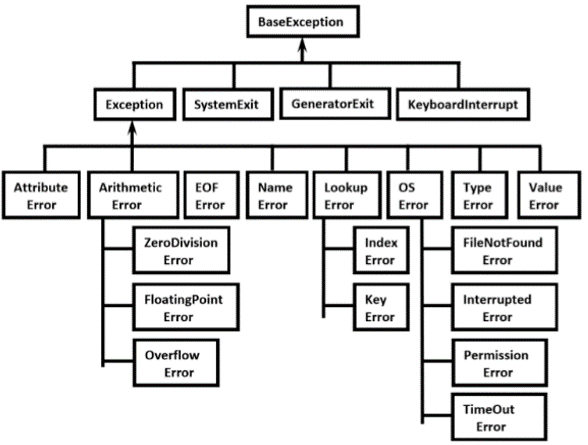

So what if we were to do this:

In [ ]:
try:
    num = int(input("Enter a number"))
    result = 2 / num
    print(result)
except Exception:
    print("Something went wrong :(")
except ValueError:
    print("uh oh - that wasn't a number")
except ZeroDivisionError:
    print("Friends don't let friends divide by zero")

Try running the above block and input a string. Now input 0. We've caused two different errors, but the same statement is being executed. Why?

Since all exceptions are a subclass of **Exception**, Python considers them to be of type **Exception**. Why does this matter? Python executes the *first relevant* except statement - in this case it will *always* be an Exception, so the first statement will execute *regardless* of what type of exception we're throwing. You need to make sure that you put any except statements for subclasses *above* those of their parent classes, otherwise the subclasses will never execute:

In [ ]:
try:
    num = int(input("Enter a number"))
    result = 2 / num
    print(result)
except ValueError:
    print("uh oh - that wasn't a number")
except ZeroDivisionError:
    print("Friends don't let friends divide by zero")
except Exception:
    print("Something went wrong :(")

Sometimes we may not want to continue the program if we encounter an error, if we want to throw an exception, we use the `raise` keyword. For example:

In [ ]:
def division(num1: int, num2: int) -> float:
    if (num2 == 0):
        raise ZeroDivisionError("We've been through this - you can't divide by zero")
    else:
        return num1 / num2

inp_1 = input("Enter first number: ")
inp_2 = input("Enter second number: ")
try:
    inp_1 = int(inp_1)
    inp_2 = int(inp_2)
except ValueError:
    print("uh oh - one of those numbers wasn't a number")

print(division(inp_1, inp_2))

We can also write our own custom exceptions. We define them the same way we define a class, making sure it inherits from **Exception**. Then, we can call it anywhere in our code by using `raise`:

In [ ]:
class MyException(Exception):
    def __init__(self, msg):
        super().__init__(msg)

thing = input("Enter your favourite society: ")
if thing != "UWCS":
    raise MyException("Ding dong, your opinion is wrong")

## Recursion means Recursion

One way to make things more compact is through recursion. Put simply, *recursive* functions are defined in terms of themselves. For example, this recursive function calculates the sum of the first $n$ integers.

In [ ]:
# Calculates 1 + 2 + ... + n, recursively
def sum_of_first(n: int):
    # Base Case (will eventually be reached)
    if n <= 0:
        return 0
    
    # General Case (argument steps down by 1 each time)
    return n + sum_of_first(n-1)

print(sum_of_first(4))
print(sum_of_first(7))
print(sum_of_first(0))

Cool, right? But be careful! Every recursive function must satisfy 3 conditions, or else you're in for a bad time:
- It must have at least one *base case*, some combination of arguments that makes it stop calling itself.
- It must have a *recursive case* that moves you towards reaching the base case.
- The base case must be reached after a *finite* number of function calls!

Too many stacked function calls will lead to a *Stack Overflow* Exception, because our computer has run out of memory.

Recursive functions are a powerful tool, because they allow us to write what might otherwise be a large chunk of code in a compact way, that (depending on what it does) might be easier to understand too.

> Task 1: What do each of the following recursive functions do?

*If you're still not quite sure, feel free to call the function with different values.*

In [ ]:
# Function 1
def f(n: int) -> int:
    if n == 0:
        return n
    return n * f(n-1)

In [ ]:
# Function 2
def r(s: str) -> bool:
    if len(s) <= 1:
        return True
    if s[0] != s[-1]:
        return False
    return r(s[1:-1])

In [ ]:
# Function 3
def p(x: int, n: int) -> int:
    if n == 0:
        return 1
    
    result = p(x, n // 2)
    result *= result
    if n % 2 == 1:
        result *= x
    return result

> Task 2: Write a recursive function that takes a list of numbers as input, and multiplies them all together.

*There are easier ways of doing this in practice, this is just to get you used to writing recursive functions.*

In [ ]:
def recursive_product(nums: list) -> int:
    # Base Case??
    if not nums:
        return 0

    # Recursive Case?
    return 404

print(recursive_product([3, 5, 4]))  # Should output 60

Looks like you've got the basics of recursion down. Let's discuss one more example before moving on - Fibonnacci numbers.

The first two Fibonnaci numbers are $F(0)=0$ and $F(1) = 1$. From there we have $F(n) = F(n-1)+F(n-2)$ - in other words, the next term in the sequence is the sum of the two previous terms. As you might expect, this is perfect for recursion. Give it a run!

In [ ]:
def fib(n: int) -> int:
    if n <= 1:
        return n
    return fib(n-1) + fib(n-2)

print(fib(4))
print(fib(20))
print(fib(50))

Hmm, that's strange. The first two function calls printed something out, but the third one didn't. Or at least, that's what it looks like. The truth is, `fib(50)` is still being computed by your machine! Surely that can't be correct, it's not that tricky to add the previous terms together until we reach $F(50)$, right? Look, here's a non-recursive version that handles it just fine (make sure to stop the previous one first):

In [ ]:
def fib_linear(n: int) -> int:
    if n <= 1:
        return n
    prev = 0
    curr = 1

    for _ in range(n-1):
        prev, curr = curr, prev + curr

    return curr

print(fib_linear(50))

So what's really going on here? It's to do with the way that functions are called by Python itself. Some functions might do something slightly different each time they're called, even with the same parameters. Because of this, after Python returns a result from `fib()`, it throws away the connection between the parameters passed and the result returned. 

So, we're not just computing one call of `fib()` for each parameter. We're computing...

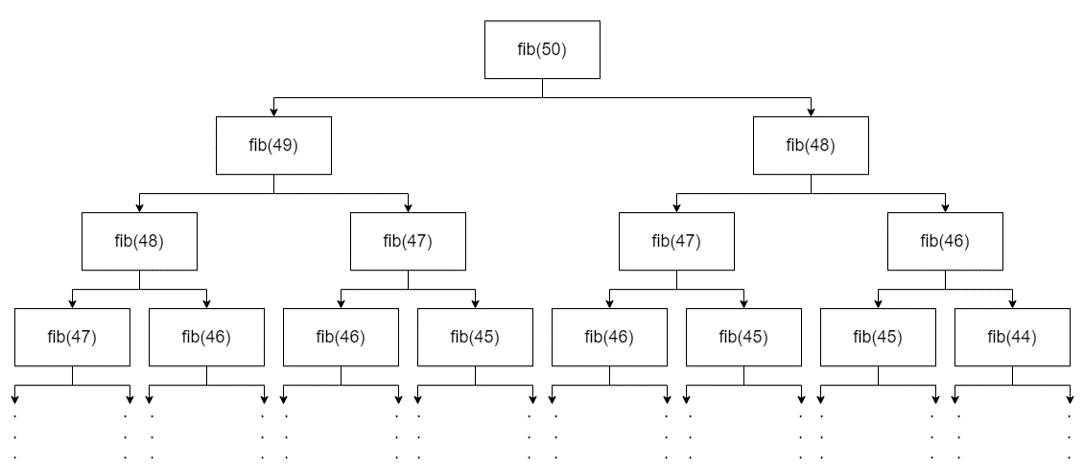

Oh god.

Okay, so how do we stop Python from doing this? Well, there are two ways. The first is to build up a dictionary of previously seen values, and stop ourselves every time we're about to make an unnecessary call by doing a lookup instead. Not amazing to read, but does the job:

In [ ]:
seen = {}

def fib_dict(n: int) -> int:
    if n <= 1:
        return n
    prev1 = seen[n-1] if n-1 in seen else fib_dict(n-1)
    prev2 = seen[n-2] if n-2 in seen else fib_dict(n-2)
    seen[n] = prev1 + prev2
    return seen[n]

print(fib_dict(50))
print(fib_dict(100))

There's a cooler answer, and it's called the `cache` **decorator**. We're not going to spend too much time discussing decorators, but all you need to know is that it's a fancy function that uses another function as argument (yes, you can do that, sorry). Something to look into after you've finished this course, eh? Behind the scenes we're effectively doing the same as the above method, cache-ing the result for later use, but it looks a lot cleaner.

In [ ]:
from functools import cache

@cache
def fib_cache(n: int) -> int:
    if n <= 1:
        return n
    return fib_cache(n-1) + fib_cache(n-2)

print(fib_cache(50))
print(fib_cache(100))

Let's put what we've learned into practice with a trickier recursive task.

*Pascal's Triangle is an important structure in probability and combinatorics. It's purpose is simple - to help in counting the number of possible results from choosing $k$ items out of a selection of $n$. There are some simple cases. For example, there's only 1 way to pick out nothing, and 1 way to pick out everything, but the others seem a bit more complicated. But, what if we laid the answers out like this?*

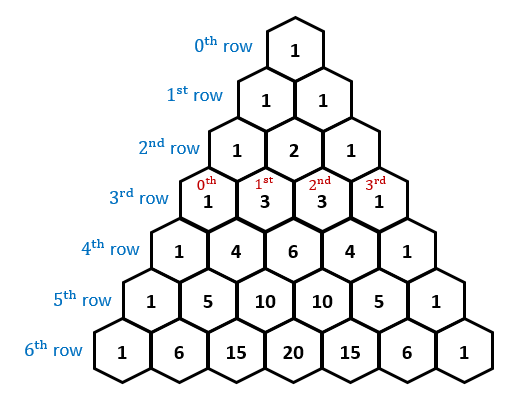

*You might have been able to spot this from the image, but each number (that isn't 1) is the sum of the two just above it! We're not going to go into the details of why, but it seems like it would be good to implement recursively, don't you think?*

> Task 3: Using the above information, write a recursive function that calculates the number of ways to choose $k$ items from a set of $n$.

In [ ]:
def choose(n: int, k: int):
    # Base case(s)
    # When is the answer easy to compute?

    # Recursive case
    # How is the function related to different calls of itself?
    return 0

# Function calls vs answers
print(choose(2, 1), 2)
print(choose(9, 9), 1)
print(choose(15, 0), 1)
print(choose(3, 2), 3)
print(choose(6, 3), 20)
print(choose(7, 5), 21) 
print(choose(12, 4), 495)
print(choose(50, 8), 536878650)  # Hmmm...

---

## Searching for an answer

Let's play a little game. More specifically, a guess the number game! I'm going to think of a random number between 1 and 1000, and you're going to guess what it is. Too high? I'll let you know. Too low? I'll let you know too. See how many attempts it takes before you get it right, and try to figure out the best strategy before moving on:

In [ ]:
# Guessing game
from random import randint
from time import sleep

answer = randint(1, 1000)  # My random number

attempts = 0
guess = 0
while True:
    sleep(0.2)

    guess = input("Guess a number between 1 and 1000: ")
    if not guess.isdigit() or int(guess) < 1 or int(guess) > 1000:
        continue

    attempts += 1
    if int(guess) > answer:
        print(f"{guess} is too high...")
    elif int(guess) < answer:
        print(f"{guess} is too low...")
    else:
        break

print(f"Correct! The number was {guess}.")
print(f"This took you {attempts} attempts.")

What was your strategy? The optimal strategy, *picking the middle of the possible numbers at each step*, ensures you always win on or before your 11th guess. Considering there's 1000 possible numbers it could have been, that's pretty good. If the number was between 1 and 1,000,000, we'd need at most 21 guesses! Even if the number were between 1 and a billion - Only 31 guesses needed!!! I think we might be onto something pretty useful here.

What we're really doing is searching. Most of the time, searching for something in a list is pretty simple. We just go through each thing in the list, one by one, and check if it matches the criteria. Worst case, is that in a list of $n$ items, we're going to have to check all $n$ of them - but on average, it's about half that. We call this method a **linear search**. An example of this is the `in` keyword.

In [ ]:
fruits = [
    "Pineapple", 
    "Apple", 
    "Fig", 
    "Cherry", 
    "Peach", 
    "Orange", 
    "Plum", 
    "Durian", 
    "Banana", 
    "Grapefruit", 
    "Pear"]

# Linear searches
print("Pear" in fruits)
print("Chocolate" in fruits)

But what if our data was in order? Well, then we can speed things up - by using the same tactics as in the guessing game.

In [ ]:
def find(items, target) -> bool:
    return search(items, target, 0, len(items) - 1)

def search(items, target, low, high) -> bool:
    if low > high:  # Guessed everywhere possible
        return False
    
    mid = (low + high) // 2  # Make a guess in the middle
    
    if items[mid] > target:  # Guess too high
        return search(items, target, low, mid - 1)
    elif items[mid] < target:   # Guess too low
        return search(items, target, mid + 1, high)
    else:  # Got it!
        return True

# Only works on lists in order (in this case, alphabetical).
fruits = ["Apple", "Banana", "Cherry", "Durian", "Fig", "Grapefruit", "Orange", "Peach", "Pear", "Pineapple"]

print(find(fruits, "Pear"))
print(find(fruits, "Chocolate"))
print(find(fruits, "Z"))

The fancier name for this is a **Binary Search**, because at each step, we're dividing the search space we have left into 2. So, how much faster is this method than a regular, linear search? Well, for small lists you won't see much improvement, but for larger lists, say, with $n$ items, we only need to check $\log(n)$ of them in the worst case! The difference couldn't be clearer:

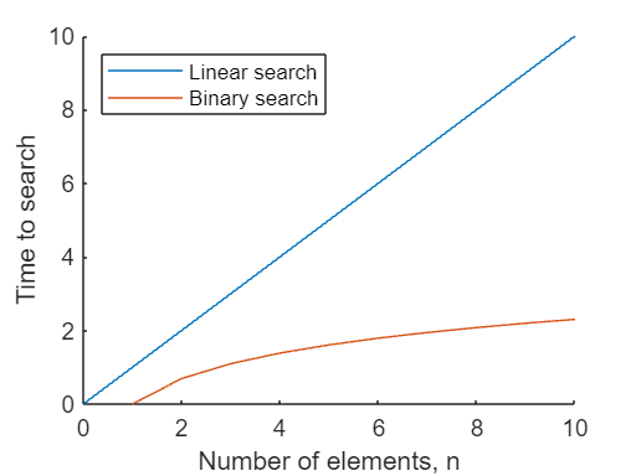

In order to work, the Binary Search can only be used on *ordered* lists. Otherwise, we can't guarantee that when we discard part of the list, we're not discarding the target item. That means you may need to sort the list before searching.

> Task 4: Create a function, `find_fast()`, that accepts an *ordered* list, and an item to look for in it. If it's there, it should return the item's index. If it's not, it should return `-1`. Try to make your code as efficient as possible.

In [ ]:
from random import randint

def find_fast(items, item):
    return binary_search(items, item, 0, len(items) - 1)

def binary_search(items, item, low, high):
    # Try modifying the narrow_down() function!
    return -1

fruits = ["Apple", "Banana", "Cherry", "Durian", "Fig", "Grapefruit", "Orange", "Peach", "Pear", "Pineapple", "Plum"]

print(find_fast(fruits, "Fig"))
print(find_fast(fruits, "orange"))
print(find_fast(fruits, "Apple"))

---

## Sorting things out

Okay, so we know that sorted lists can be searched through way faster. Great! But wait, how do we even sort a list in the first place? Well, there are [many, many different algorithms](https://en.wikipedia.org/wiki/Sorting_algorithm#Comparison_of_algorithms), each with their own benefits and drawbacks, which we're not going to go into because we're on the clock here! But we do think there's something you should know:

### A Quick Detour: Big-O Notation

If a program is going to output the correct answer, why change it? As you might have gathered from the last two sections, one of those reasons is efficiency. The best solutions will try to minimise both time and memory usage. But how can we measure how good these improvements and optimisations are? Sure, you can time how long it takes your machine to do a task, but some machines execute instructions at different speed to others, and computer hardware is constantly improving. We're going to need a system that ignores specific machine details.

We commonly use *Big-O Notation* for algorithms to estimate the number of instructions needed relative to the input size. For example, a script like this...

In [ ]:
# The size of nums affects the time things take to run.
nums = [75, -63, 39, -88, 83, -7, 12, -99, 83, 29, -43, -33, -74, -76, -21, -100, 26, 97, 37, -61]
target = 14
found = False

# Determines if any two distinct numbers in the list add up to the target
for i in range(len(nums)):
    for j in range(len(nums)):
        if nums[i] + nums[j] == target and i != j:
            found = True

print(":)") if found else print(":(")

...would be considered $O(n^2)$, where $n$ is the size of the input array `nums`. Why? Well, that's because we go over all $n$ items in the list, and for each, compare it against all $n$ items in the list. That's in the order of $n \times n$ instructions, or $n^2$. So, the time taken grows proportional to the square of the input size. Hopefully that makes sense! We discussed other examples in the previous section, like linear search, which was $O(n)$, along with binary search, which was $O(\log(n))$.

A couple of details about the definition, if you're interested:
- Even if we use say, $50$ instructions on each iteration of a loop, it would still be $O(n)$. Ignore the constants, as they don't matter for big $n$.
- If we're running two algorithms one after another, say, one taking $O(n)$ and another $O(n^2)$, the higher power dominates. The full script is $O(n^2)$.
- Unless stated otherwise, we're interested in *worst-case* time complexity.

Alright, back to sorting. One of the first and most natural sorting algorithms you might learn is Bubble Sort, which takes $O(n^2)$ time. There's also Quick Sort, which (ironically) also takes $O(n^2)$ time. For smaller inputs it's not a huge problem, but if we're sorting lists with thousands of elements, things would quickly get out of hand.

Not to say that there aren't *worse* sorting algorithms out there. The ***Bogosort*** has no upper bound on its runtime (aka O(∞)) and an **average** runtime of about $O((n+1)!)$. Here's a lovely implementation of it below, and an example list of 12 numbers for it to sort. Go on, give it a run!

In [ ]:
from random import shuffle

def in_order(some_list):
    for i in range(len(some_list)-1):
        if some_list[i] >= some_list[i+1]:
            return False
    return True

def bogosort(some_list):
    while not in_order(some_list):
        shuffle(some_list)

nums = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1]
bogosort(nums)
print(nums)

Unsuprisingly, nobody actually uses Bogosorts.

Don't worry about implementing your own sorting algorithms - Python has your back, with an $O(n \log(n))$ one. Fancy! We don't need to worry about how it's implemented, of course. If we have some list `things`:

- The `things.sort()` method sorts a list in-place, by modifying the original.
- The `sorted(things)` function returns a sorted copy of the list, without modifying the original.

By default, `things` will be sorted in ascending order, but you can use the `reverse` keyword argument, which is a boolean, to change this.

> Task 5: Sort the `nums` list below in two ways - *ascending* order and *descending* order. Output both, making it clear which one is which.

In [ ]:
nums = [75, -63, 39, -88, 83, -7, 12, -99, 83, 29, -43, -33, -74, -76, -21, -100, 26, 97, 37, -61]

# Ascending

# Descending

---

## A Comprehensive Description

You may have gathered by now that Python is a big fan of shorthand notations. We're going to introduce another: List Comprehensions. They let you cut down on the amount of lines and boilerplate code whenever you're creating a list from existing data.

For example, let's say you're trying to create a copy of a list where 100 has been added to every element. One way is like this:

In [ ]:
my_list = [3, 15, 13, 16, 21, 20, 9, 14, 7]

new_list = []
for num in my_list:
    new_list.append(num + 100)

print(new_list)

But another, more condensed version using a list comprehension would be like this:

In [ ]:
my_list = [3, 15, 13, 16, 21, 20, 9, 14, 7]

new_list = [num + 100 for num in my_list]

print(new_list)

In this case, it's much more compact and readable! The general syntax is `comprehension = [expression for elem in iterable]`, where the `expression` can use the `elem` variable. As you might expect, `elem` is set to each element in the `iterable`. Here's a few more examples:

In [ ]:
# Even numbers from 1 to 50
even_50 = [num for num in range(1, 51, 2)]
print(even_50)

# Combining the first character of each word into a string
compliments = ["Crazy", "Ostentacious", "Marvelous", "Perfect", "Unbelievable", "Treasured", "Incredible", "Noble", "Grand"]
secret_word = "".join([word[0] for word in compliments])
print(secret_word)

# Nested list comprehensions to form times tables
times_tables = [[i * j for j in range(1, 11)] for i in range(1, 11)]
print(times_tables)

You can also have an *if* condition after the `iterable` in the comprehension, which acts as a filter. You can use the `elem` varaible here too.

In [ ]:
cvs = [
    "I consider myself to be an epic gamer with only the finest fortnite skills",
    "I'm a highly motivated individual with at least two seconds of experience",
    "After touching my very first controller, I knew it was in my destiny to play games.",
    "I'm literally the daughter of your CEO, you're going to hire me anyways.",
    "Life isn't a game. I'm at the peak of my skills, with years of experience in the industry."
]

no_gamer_cvs = [cv for cv in cvs if "game" not in cv]
print(no_gamer_cvs)

> Task 6: You've been given a list of currently enrolled students at the University in the form of the tuples `(name, year_of_study)`, and want to output a list of names: all the students that will *definitely* be studying next year. Use a single list comprehension to do this.

In [ ]:
enrolled = [("Keegan", 4), ("Alia", 2), ("Tomas", 3), ("Alistair", 2), ("Adriano", 4), ("Piotr", 2)]

# Output the names of who will *definitely* be enrolled next year (assuming they don't fail their exams!)


A word of warning: one of the issues with using list comprehensions is that your 'simplification' has the potential to become unreadable. This is especially true when using nested list comprehensions, or needing overly long conditions with many conditions. If things do start to get tricky to write or awkward to read, it might be best to stick with the long way.

---

#### **Congrats on making it to the end of the Cross-Society Python Course!**

Thanks so much for taking part, and we hope you found it useful.

---

# Wahoot Week 6

This week, the content was quite tricky. So, the Wahoot is pretty relaxed.

In the Wahoot folder, open `game.py`. Functionally, there's nothing *incorrect* about it, but... well, you can see the problem.

> Task 1: Identify and fix as many **Efficiency** problems as you can. 
>
> *There are at least three functions this applies to.*

> Task 2: Identify and fix as many **Compactness** problems as you can, without sacrificing Efficiency.
>
> *There are less compactness issues here.*

> Task 3: Identify and fix as many **Readability** problems as you can. If you sacrifice some Compactness, consider why.

To make sure you can distinguish between the three types of problems, we'd prefer you do the tasks in order - even if it is tempting to fix certain types of problems first!

---

# Bonus Tasks

Finished everything else? These tasks are more challenging, and should test your knowledge of our final week of content. Don't be discouraged if you can't do them all, especially as it's our most difficult set!

> Bonus 1: Consider the example script we used to explain Big O notation, which was $O(n^2)$. By first sorting the list, improve the worst case time complexity to $O(n \log(n))$.

In [ ]:
from random import randint
nums = [randint(-1000, 1000) for _ in range(50)]  # The size of nums affects the time things take to run.
target = randint(-50, 50)
print(nums)
print(target)
found = False

# Determines if any two distinct numbers in the list add up to the target
for i in range(len(nums)):
    for j in range(len(nums)):
        if nums[i] + nums[j] == target and i != j:
            found = True

print(":)") if found else print(":(")

*You're a pirate, sailing the seven seas and looking for treasure. You've got a treasure map, consisting of a grid split into many different squares. Not only that, but it's marked with the number of buried treasures in each square's region! But alas, the strong tailwinds mean you can only sail to squares south or east of your current location, starting at the most north-west square. Can you find the most bountiful route through these waters, ending at your home port in the very south-east?*

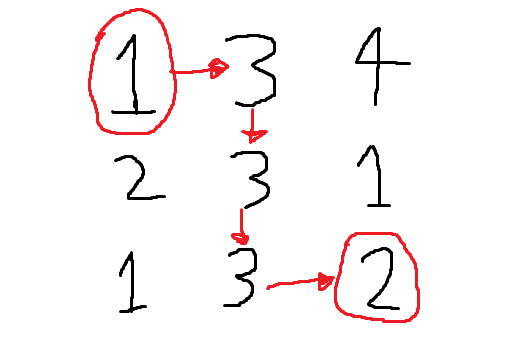

> Bonus 2: Write a function that takes in a 2D list representing the treasure values on each map grid square, and returns the maximum number of treasures that could be claimed in a single trip across these windy waters...

In [ ]:
def maximum_treasure(grid) -> int:
    # This is just the maximum treasure count at the bottom-right grid square. Return it!
    return 0

def max_at_square(grid, x: int, y: int) -> int:
    # What makes a coordinate invalid?
    # What should we return in this case?
    
    # The maximum number of treasures up to and including this square.
    # ...the best of two other best routes, plus itself?
    return 0

print(
    maximum_treasure(
        [
            [1, 3, 4], 
            [2, 3, 1], 
            [1, 3, 2]
        ]
    )  # Should return 12 (1 -> 3 -> 3 -> 3 -> 2)
)
# What will happen on much larger lists?
print(maximum_treasure([[1] * 50] * 50))
# :)

*For passing the final test, it might be helpful to use a class.*

🖋️ ***This week was written by Alia & Keegan from the [Computing Society](https://go.uwcs.uk/links)***

We hope you enjoyed the course!